In [1]:

#importing usefull library
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

#importing some custom function
from scripts import make_fig
from scripts import utilities


In [7]:
#import new data
in_file = 'increase_concentration/combined/txt/proteinGroups.txt'
test_df = pd.read_csv(in_file, sep='\t')
df = utilities.clean(test_df)
df['prot_id']=[utilities.clean_id(n) for n in df['Protein IDs']]
df.set_index('prot_id',inplace=True)
dsc_diz_8 = dict(zip(df.index.values, test_df['Fasta headers']))
df_8 = utilities.get_data(df, 'LFQ intensity ', '', np.arange(1,11,1))
df_8.head()

removed  108 Only identified by site
tot  108  entries removed
---------------
removed  34 Reverse
tot  142  entries removed
---------------
removed  52 Potential contaminant
tot  194  entries removed
---------------
removed  458 Peptide counts (unique)
tot  652  entries removed
---------------
got:  2983 protein now


,LFQ intensity 1,LFQ intensity 2,LFQ intensity 3,LFQ intensity 4,LFQ intensity 5,LFQ intensity 6,LFQ intensity 7,LFQ intensity 8,LFQ intensity 9,LFQ intensity 10
prot_id,,,,,,,,,,
Tb927.5.4450,0,19087000,32017000,24320000,22521000,14483000,0,0,0,0
Tb927.5.4460,964920000,358230000,109250000,42627000,19150000,0,0,0,0,0
Tb927.5.4480,103910000,72221000,44635000,34392000,27449000,24625000,0,0,0,0
Tb927.5.4500,61167000,65243000,66910000,79501000,97954000,76544000,50579000,96265000,85605000,136910000
Tb927.5.4560,98074000,127690000,172990000,148380000,142590000,206120000,284880000,147090000,80225000,67946000


In [8]:
#import new data
#import old data and remove rubbish entires
in_file = '180813_XL4_60min/txt/proteinGroups.txt'
test_df = pd.read_csv(in_file, sep='\t')
df = utilities.clean(test_df)
df['prot_id']=[utilities.clean_id(n) for n in df['Protein IDs']]
df.set_index('prot_id',inplace=True)
dsc_diz_4 = dict(zip(df.index.values, test_df['Fasta headers']))
df_4 = utilities.get_data(df, 'LFQ intensity ', '', np.arange(1,11,1))
df_4.head()

removed  160 Only identified by site
tot  160  entries removed
---------------
removed  41 Reverse
tot  201  entries removed
---------------
removed  39 Potential contaminant
tot  240  entries removed
---------------
removed  419 Peptide counts (unique)
tot  659  entries removed
---------------
got:  3648 protein now


d:\my_env\prediction\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LFQ intensity 1,LFQ intensity 2,LFQ intensity 3,LFQ intensity 4,LFQ intensity 5,LFQ intensity 6,LFQ intensity 7,LFQ intensity 8,LFQ intensity 9,LFQ intensity 10
prot_id,,,,,,,,,,
Tb927.5.4450,19307000,19561000,17843000,8301800,10589000,11477000,16356000,14610000,15782000,43277000
Tb927.5.4460,3326800000,718570000,239440000,48376000,12224000,0,0,0,0,0
Tb927.5.4480,220640000,142450000,56078000,43233000,17119000,0,0,0,0,0
Tb927.5.4500,81644000,57203000,56193000,72031000,74363000,59733000,52452000,51483000,52823000,89125000
Tb927.5.4520,0,12769000,0,0,0,0,0,0,0,0


In [9]:
#the dataset does not need cleaning
#we extract 48 columns from the average of 4 replicates of the SEC 1000
in_file = 'test_small/Thomas_sec300/LFQ-intensity-E3017-E3019-E3021-E3023_0_0_0.6.txt'
df = pd.DataFrame.from_csv(in_file, sep='\t')#a look the the daa
df_sec300 = df.iloc[:,0:48]
df_sec300.head()

d:\my_env\prediction\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,...,median_39,median_40,median_41,median_42,median_43,median_44,median_45,median_46,median_47,median_48
Tb927.10.3210,688310000.0,276010000.0,215760000.0,199840000.0,171215000.0,190955000.0,93088000.0,139705000.0,176220000.0,202745000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41560000.0,1.258930e+09,693180000.0,2.658850e+09
Tb927.5.2310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
Tb927.8.7570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
Tb927.3.3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202145000.0,329270000.0,253550000.0,165110000.0,0.0,91555000.0,0.0,0.000000e+00,0.0,0.000000e+00
Tb927.7.5640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,451700000.0,428980000.0,248410000.0,217445000.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00


In [10]:
common = set(df_4.index.values) & set(df_8.index.values)
print('4mn dataset:', len(set(df_4.index.values)))
print('8mn dataset:', len(set(df_8.index.values)))
print('common:', len(common))
# we will focus the analysis only on the protein in common
df_4=df_4.loc[common]
df_8=df_8.loc[common]
df_sec300=df_sec300.loc[common]
df_sec300.dropna(inplace=True)
print('sec300:',df_sec300.shape[0])

4mn dataset: 3640
8mn dataset: 2970
common: 2857
sec300: 2246


d:\my_env\prediction\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


d:\my_env\prediction\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


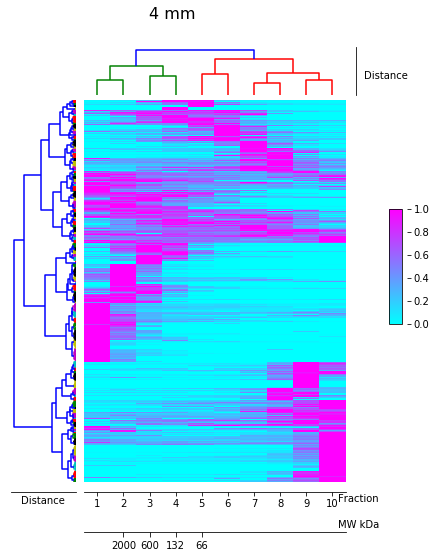

In [11]:
#create the plot
den_rows = make_fig.plot_experiment(
     df_4.apply(utilities.norm_max,1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 1,
     title='4 mm',
     fig_name = 'Fernando_4.png',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      2:'2000', 
                      3:'600', 
                      4:'132', 
                      5:'66', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False,
    owerwrite_order=False,
     )


d:\my_env\prediction\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
d:\my_env\prediction\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
d:\my_env\prediction\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
d:\my_env\prediction\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

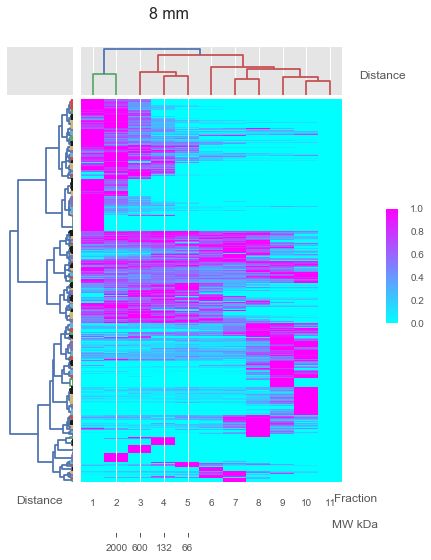

In [61]:
#create the plot
tt=make_fig.plot_experiment(
     df_8.apply(utilities.norm_max,1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 1,
     title='8 mm',
     fig_name = 'Fernando_8.png',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      2:'2000', 
                      3:'600', 
                      4:'132', 
                      5:'66', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False,
    #owerwrite_order=den_rows,
     )


In [13]:
df_sec300['max'] = df_sec300.apply(np.argmax, axis=1)
df_sec300['max'] = [int(n.split('_')[-1]) for n in df_sec300['max']]
df_8['max'] = df_8.apply(np.argmax, axis=1)
df_4['max'] = df_4.apply(np.argmax, axis=1)
df_8['max'] = [int(n.split(' ')[-1]) for n in df_8['max']]
df_4['max'] = [int(n.split(' ')[-1]) for n in df_4['max']]


d:\my_env\prediction\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


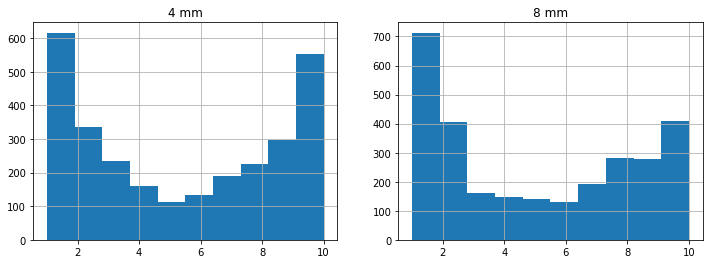

In [14]:
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
df_4['max'].hist(ax=axes[0])
df_8['max'].hist(ax=axes[1])
axes[0].set_title('4 mm')
axes[1].set_title('8 mm')
plt.show()

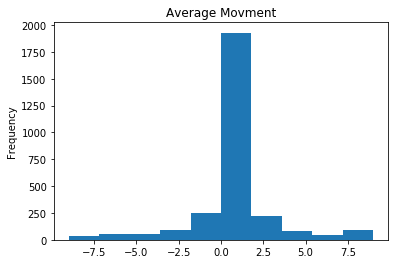

In [15]:
diff = df_4['max']-df_8['max']
diff.plot(kind='hist')
plt.title('Average Movment')
plt.show()

In [16]:
from scipy import signal
del df_sec300['max']
df_sec300['peakind']=[signal.find_peaks_cwt(df_sec300.loc[data].values, [4,5]) for data in df_sec300.index.values]
df_sec300.head()

,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,...,median_40,median_41,median_42,median_43,median_44,median_45,median_46,median_47,median_48,peakind
Tb927.11.2950,294125000.0,345200000.0,357170000.0,319400000.0,323785000.0,245245000.0,261170000.0,250695000.0,189950000.0,163895000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.364800e+08,256915000.0,488075000.0,939165000.0,[4]
Tb927.7.990,477790000.0,438685000.0,374955000.0,410130000.0,340145000.0,390475000.0,420240000.0,336935000.0,334170000.0,313025000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,[4]
Tb927.11.13870,0.0,0.0,0.0,0.0,0.0,6416500.0,0.0,0.0,11649500.0,0.0,...,2.230600e+10,3.216000e+10,1.741450e+10,7.065950e+09,2.247700e+09,1.180845e+09,327190000.0,51670000.0,0.0,"[8, 41]"
Tb927.11.9050,103516000.0,104278500.0,87590500.0,97404000.0,77565000.0,87030500.0,86093000.0,71407000.0,73958000.0,87838500.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,"[4, 30]"
Tb927.4.5350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,[14]


In [27]:
## Which are the proteins that move fractions
selection = diff.sort_values().tail(50)
temp = pd.DataFrame()
temp['prot']=selection.index.values
temp['movment']=selection.values
temp['desc'] = [dsc_diz_4[n].split('|')[4].replace('gene_product=','') if n.startswith('>T') else 'none' for n in temp['prot']]
temp.set_index('prot',inplace=True)
temp = temp.join(df_sec300,how='left')
temp[['movment','desc','peakind']].head(50)

,movment,desc,peakind
prot,,,
Tb927.11.7270,8,none,"[15, 41]"
Tb927.10.16170,8,none,"[5, 20]"
Tb927.2.5760,8,none,"[4, 23, 37, 43, 45]"
Tb927.9.8950,8,none,[4]
Tb927.2.2430,8,none,"[3, 35]"
Tb927.8.4610,8,none,[6]
Tb927.11.5680,8,none,[38]
Tb927.11.9100,8,none,[1]
Tb927.7.5700,8,none,[4]


In [36]:
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt 
import pandas as pd


def print_result(start_df_shape, shape_before, df, what):
    removed = shape_before[0]- df.shape[0]
    removed_from_beginning = start_df_shape[0]-df.shape[0]
    if removed > 0:
        print ('removed ',removed, what) 
        print ('tot ', removed_from_beginning, ' entries removed')
        print ('---------------')
    else:
        print (what)
        print ('nothing removed')
        print ('---------------')
        
def clean(df):     
    before,start = df.shape,df.shape
    col = 'Reverse'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
        
    before = df.shape
    col = 'Potential contaminant'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
    
    return df
    


In [52]:
print(217033/281615)

0.7706727269499138


In [39]:
evi_8 = pd.read_csv('increase_concentration/combined/txt/evidence.txt',sep='\t')
pep_8 = pd.read_csv('increase_concentration/combined/txt/peptides.txt',sep='\t')
pep_8['Proteins']=[utilities.clean_id(n) for n in pep_8['Leading razor protein']]
pep_8 = pep_8[pep_8['Proteins'].isin(common)]
evi_8 = evi_8[evi_8['Protein group IDs'].isin(pep_8['Protein group IDs'])]
print (evi_8.shape)

(217033, 66)


In [44]:
evi_4 = pd.read_csv('180813_XL4_60min/txt/evidence.txt',sep='\t')
pep_4 = pd.read_csv('180813_XL4_60min/txt/peptides.txt',sep='\t')
pep_4['Proteins']=[utilities.clean_id(n) for n in pep_4['Leading razor protein']]
pep_4 = pep_4[pep_4['Proteins'].isin(common)]
evi_4 = evi_4[evi_4['Protein group IDs'].isin(pep_4['Protein group IDs'])]
print (evi_4.shape)

d:\my_env\prediction\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(281615, 66)


In [45]:
evi_4['count_pep']=1
temp_4 = evi_4[['DSSTP_K','DSSTP_n_term','count_pep','Fraction']].groupby(["Fraction"]).sum()
temp_4['fc_DSSTP_K']=temp_4['DSSTP_K']/temp_4['count_pep']
temp_4['fc_DSSTP_n_term']=temp_4['DSSTP_n_term']/temp_4['count_pep']
temp_4['Fraction']=temp_4.index.values

In [42]:
evi_8['count_pep']=1
temp_8 = evi_8[['DSSTP_K','DSSTP_n_term','count_pep','Fraction']].groupby(["Fraction"]).sum()
temp_8['fc_DSSTP_K']=temp_8['DSSTP_K']/temp_8['count_pep']
temp_8['fc_DSSTP_n_term']=temp_8['DSSTP_n_term']/temp_8['count_pep']
temp_8['Fraction']=temp_8.index.values

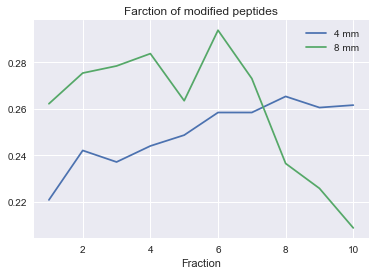

In [46]:
fig,ax=plt.subplots()
temp_4.plot(x='Fraction',y='fc_DSSTP_K',ax=ax, label='4 mm')
temp_8.plot(x='Fraction',y='fc_DSSTP_K',ax=ax, label='8 mm')
plt.title('Farction of modified peptides')
plt.show()

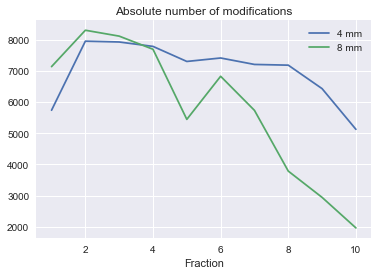

In [47]:
fig,ax=plt.subplots()
temp_4.plot(x='Fraction', y='DSSTP_K',ax=ax, label='4 mm')
temp_8.plot(x='Fraction', y='DSSTP_K',ax=ax, label='8 mm')
plt.title('Absolute number of modifications')
plt.show()

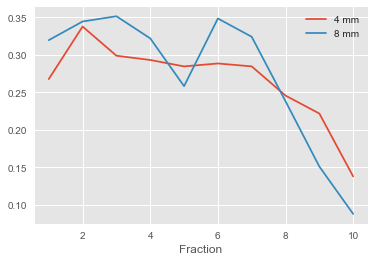

In [50]:
#tcomplex
prots = set([
'Tb927.11.16760',
'Tb927.10.8190',
'Tb927.11.14250',
'Tb927.8.3150',
'Tb927.11.3240',
#'Tb927.11.1900'
])
evi_4['Proteins']=[utilities.clean_id(n) for n in evi_4['Proteins']]
selection_4 = evi_4[evi_4['Proteins'].isin(prots)]
#proteasome = df[df['proteasome'].isin(prots)]
selection_4 = selection_4[['Sequence','Fraction','DSSTP_K']]
selection_4['tot_detection']=1
selection_4 = selection_4[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection_4['fc_tcomplex']=selection_4['DSSTP_K']/selection_4['tot_detection']
selection_4['Fraction']=selection_4.index.values

evi_8['Proteins']=[utilities.clean_id(n) for n in evi_8['Proteins']]
selection_8 = evi_8[evi_8['Proteins'].isin(prots)]
#proteasome = df[df['proteasome'].isin(prots)]
selection_8 = selection_8[['Sequence','Fraction','DSSTP_K']]
selection_8['tot_detection']=1
selection_8 = selection_8[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection_8['fc_tcomplex']=selection_8['DSSTP_K']/selection_8['tot_detection']
selection_8['Fraction']=selection_8.index.values


fig,ax = plt.subplots()
selection_4.plot(x='Fraction',y='fc_tcomplex',ax=ax,label='4 mm')
selection_8.plot(x='Fraction',y='fc_tcomplex',ax=ax,label='8 mm' )
plt.show()

#temp['DSSTP_K'].value_counts()
#selection[['Fraction','DSSTP_K','tot_detection']].head()


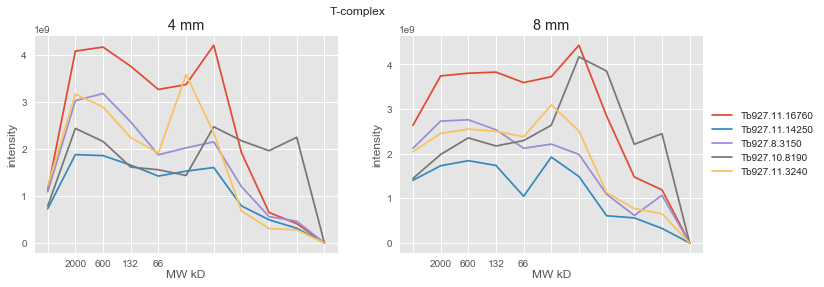

In [51]:
#a function to facilitate the line plot
#of a complex
def plot_line(df, ax, title, 
              new_ticks=['','2000','600','132','66','','','','',''],
              legend=False):
    plt.style.use('ggplot')
    #remove all zero entries
    df.fillna(0,inplace=True)
    df = df[(df.T != 0).any()]
    df.T.plot(ax=ax)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(1,4))
    ax.set_xticks( [n for n in range(df.shape[1])])
    ax.set_xticklabels( [n for n in range(df.shape[1])])
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),  
              fancybox=True, framealpha=0.5, fontsize = 'small')
    else:
        ax.legend_.remove()
    ax.set_xlabel('MW kD', labelpad=1)
    ax.set_ylabel('intensity', rotation=90)
    ax.set_title(title)
    ax.set_xticklabels(new_ticks)
    
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))    
plot_line(df_4.loc[prots], axes[0], '4 mm')
plot_line(df_8.loc[prots], axes[1], '8 mm')
#plot_line(df_4.loc[prots]/df_8.loc[prots], axes[2], '8 mm')
plt.suptitle('T-complex')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

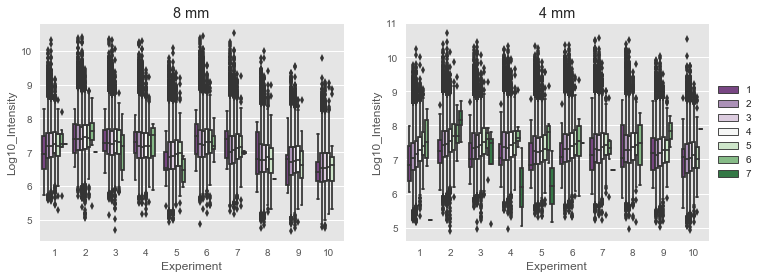

In [53]:
def make_plot(df=pd.DataFrame(), 
              x='', y='', hue='', ax='', 
              legend=False, title =False):
    import seaborn as sns
    #fig, ax = plt.subplots()
    sns.boxplot(x=x, y=y, hue=hue, data=df, palette="PRGn", ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if title:
        ax.set_title(title)
    else:
        ax.set_title(hue)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_visible(legend)
    #ax.legend.visible=False
    
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))   
evi_4['Log10_Intensity']=np.log10(evi_4['Intensity'])
evi_8['Log10_Intensity']=np.log10(evi_8['Intensity'])
make_plot(df=evi_8, x='Experiment', y='Log10_Intensity', hue='Charge',ax=axes[0], title='8 mm')
make_plot(df=evi_4, x='Experiment', y='Log10_Intensity', hue='Charge',ax=axes[1], legend=True, title='4 mm')
plt.show()


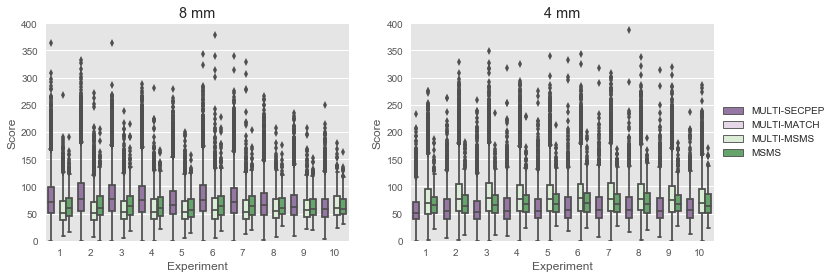

In [54]:
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))   
make_plot(df=evi_8, x='Experiment', y='Score', hue='Type',ax=axes[0], title='8 mm')
make_plot(df=evi_4, x='Experiment', y='Score', hue='Type',ax=axes[1], legend=True, title='4 mm')
axes[0].set_ylim(0,400)
axes[1].set_ylim(0,400)
plt.show()

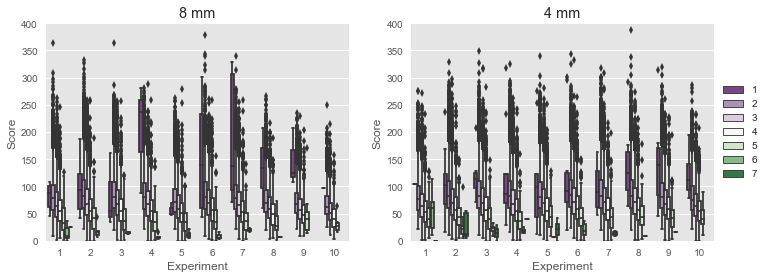

In [55]:
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))   
make_plot(df=evi_8, x='Experiment', y='Score', hue='Charge', ax=axes[0], title='8 mm')
make_plot(df=evi_4, x='Experiment', y='Score', hue='Charge', ax=axes[1], legend=True, title='4 mm')
axes[0].set_ylim(0,400)
axes[1].set_ylim(0,400)
plt.show()

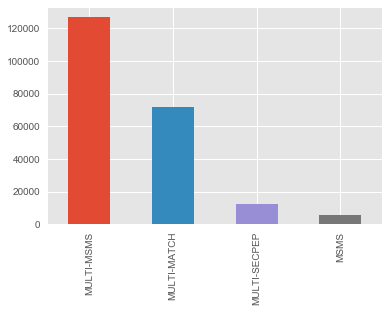

In [56]:
#The type of the feature (In case of label-free data there is no difference between 'MULTI' and 'ISO').
#'MSMS'         – for an MS/MS spectrum without an MS1 isotope pattern assigned.
#'ISO-MSMS'     – MS1 isotope cluster identified by MS/MS.
#'MULTI-MSMS'   – MS1 labeling cluster identified by MS/MS.
#'MULTI-SECPEP' – MS1 labeling cluster identified by MS/MS as second peptide.
#'MULTI-MATCH'  – MS1 labeling cluster identified by matching between runs.
evi_8['Type'].value_counts().plot(kind='bar')

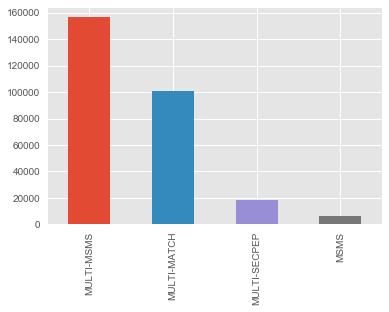

In [57]:
evi_4['Type'].value_counts().plot(kind='bar')

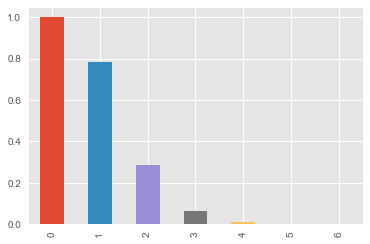

In [58]:
temp = evi_4['Missed cleavages'].value_counts()/evi_4['Missed cleavages'].value_counts().loc[0]
temp.sort_index(inplace=True)
temp.plot(kind='bar')

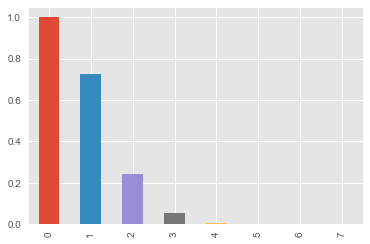

In [59]:
temp = evi_8['Missed cleavages'].value_counts()/evi_8['Missed cleavages'].value_counts().loc[0]
temp.sort_index(inplace=True)
temp.plot(kind='bar')